In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


***

In [2]:
# Code start :

In [3]:
data=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***

In [5]:
#CLEANING DATA

In [6]:
data.info() #81 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=data.copy()
#Filtering out columns with 80% of values identical
columns_to_drop=df.columns[[sum(df[col]==df[col].mode()[0])/df[col].count()>0.8 for col in df.columns]]

print(columns_to_drop)

Index(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond',
       'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional',
       'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [9]:
#Visual check of the colums to drop
#for col in columns_to_drop :
#    sns.histplot(data=df,x=col)
#    plt.show()

In [10]:
df=df.drop(columns_to_drop,axis=1)

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
df.info() #51 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LotConfig     1460 non-null   object 
 8   Neighborhood  1460 non-null   object 
 9   HouseStyle    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  YearBuilt     1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  RoofStyle     1460 non-null   object 
 15  Exterior1st   1460 non-null   object 
 16  Exterior2nd   1460 non-null   object 
 17  MasVnrType    1452 non-null   object 
 18  MasVnrArea    1452 non-null 

In [13]:
#Filtering out columns with 80% of nan
columns_to_drop2=df.columns[[df[col].isna().sum()/df[col].count()>0.8 for col in df.columns]]

print(columns_to_drop2)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence'], dtype='object')


In [14]:
df=df.drop(columns_to_drop2,axis=1)

In [15]:
df.info() #47 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   LotShape      1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  RoofStyle     1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1452 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  ExterQual     1460 non-null 

In [16]:
#Remaining columns with Nans
columns_with_nan=df.columns[[df[col].isna().sum()>0 for col in df.columns]]
print(columns_with_nan)

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'GarageType', 'GarageYrBlt', 'GarageFinish'],
      dtype='object')


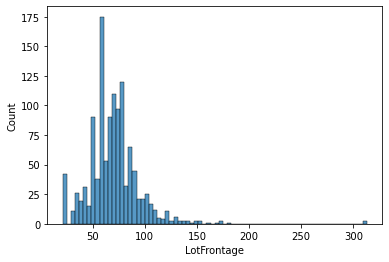

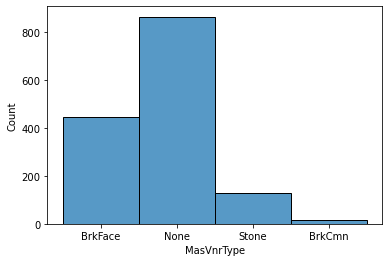

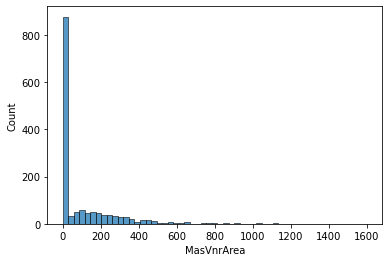

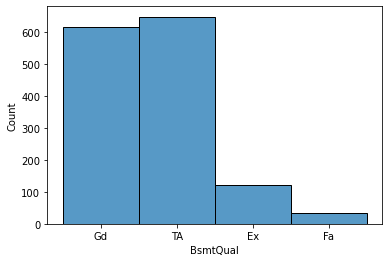

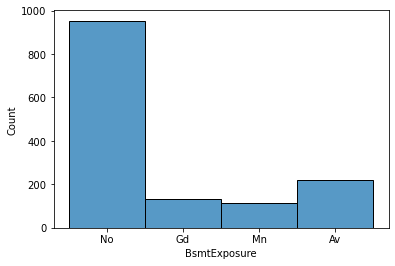

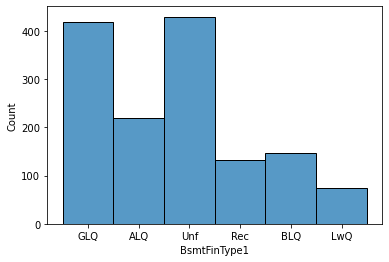

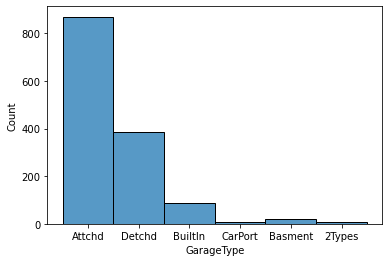

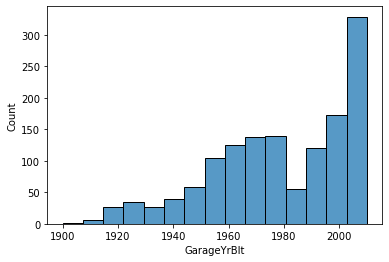

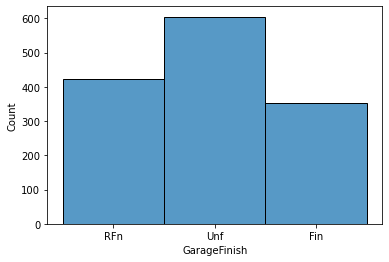

In [17]:
#Visual check of the colums with Nans
for col in columns_with_nan :
    sns.histplot(data=df,x=col)
    plt.show()

In [18]:
df[df.MasVnrType.isna()].MasVnrArea.unique()  
#all nans in MasVnrType correspond to nan in MasVnrArea ->will be filled with "None"

array([nan])

In [19]:
df[df.MasVnrArea.isna()].MasVnrType.unique() 
#all nans in MasVnrArea correspond to nan in MasVnrType -> will be filled with 0

array([nan], dtype=object)

In [20]:
df[df.BsmtQual.isna()].TotalBsmtSF.describe() 
#all nans correspond to a surface of 0.

count    37.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: TotalBsmtSF, dtype: float64

In [21]:
df[df.BsmtQual.isna()].info()
#other related features are also nan -> BsmtQual nans will be filled with  "NA" (No Basement)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 17 to 1412
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            37 non-null     int64  
 1   MSSubClass    37 non-null     int64  
 2   MSZoning      37 non-null     object 
 3   LotFrontage   31 non-null     float64
 4   LotArea       37 non-null     int64  
 5   LotShape      37 non-null     object 
 6   LotConfig     37 non-null     object 
 7   Neighborhood  37 non-null     object 
 8   HouseStyle    37 non-null     object 
 9   OverallQual   37 non-null     int64  
 10  OverallCond   37 non-null     int64  
 11  YearBuilt     37 non-null     int64  
 12  YearRemodAdd  37 non-null     int64  
 13  RoofStyle     37 non-null     object 
 14  Exterior1st   37 non-null     object 
 15  Exterior2nd   37 non-null     object 
 16  MasVnrType    37 non-null     object 
 17  MasVnrArea    37 non-null     float64
 18  ExterQual     37 non-null    

In [22]:
df[df.BsmtExposure.isna()].info() #1 non nan in BsmtQual 
# BsmtQual (Gd=Good), BsmtFinType1 (Unf=Unfinshed), BsmtUnfSF>0 ->will be filled with "No" (No exposure)
# rest of nans will be filled with "NA" No Basement

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 17 to 1412
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            38 non-null     int64  
 1   MSSubClass    38 non-null     int64  
 2   MSZoning      38 non-null     object 
 3   LotFrontage   32 non-null     float64
 4   LotArea       38 non-null     int64  
 5   LotShape      38 non-null     object 
 6   LotConfig     38 non-null     object 
 7   Neighborhood  38 non-null     object 
 8   HouseStyle    38 non-null     object 
 9   OverallQual   38 non-null     int64  
 10  OverallCond   38 non-null     int64  
 11  YearBuilt     38 non-null     int64  
 12  YearRemodAdd  38 non-null     int64  
 13  RoofStyle     38 non-null     object 
 14  Exterior1st   38 non-null     object 
 15  Exterior2nd   38 non-null     object 
 16  MasVnrType    38 non-null     object 
 17  MasVnrArea    38 non-null     float64
 18  ExterQual     38 non-null    

In [23]:
df[df.BsmtFinType1.isna()].info() #all BsmtQual are nan -> will be remplaced with "NA"  (No Basement)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 17 to 1412
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            37 non-null     int64  
 1   MSSubClass    37 non-null     int64  
 2   MSZoning      37 non-null     object 
 3   LotFrontage   31 non-null     float64
 4   LotArea       37 non-null     int64  
 5   LotShape      37 non-null     object 
 6   LotConfig     37 non-null     object 
 7   Neighborhood  37 non-null     object 
 8   HouseStyle    37 non-null     object 
 9   OverallQual   37 non-null     int64  
 10  OverallCond   37 non-null     int64  
 11  YearBuilt     37 non-null     int64  
 12  YearRemodAdd  37 non-null     int64  
 13  RoofStyle     37 non-null     object 
 14  Exterior1st   37 non-null     object 
 15  Exterior2nd   37 non-null     object 
 16  MasVnrType    37 non-null     object 
 17  MasVnrArea    37 non-null     float64
 18  ExterQual     37 non-null    

In [24]:
df[df.GarageType.isna()].GarageArea.describe() # All GarageArea are 0 -> will be filled with "NA" (No Garage)

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [25]:
df[df.GarageYrBlt.isna()].GarageArea.describe()# All GarageArea are 0 -> will be filled with 0

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [26]:
df[df.GarageFinish.isna()].GarageArea.describe()# All GarageArea are 0 -> will be filled with "NA" (No Garage)


count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [27]:
#Columns with nans:
#Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtExposure','BsmtFinType1', 'GarageType', 'GarageYrBlt', 'GarageFinish'],dtype='object')

df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType']= df['MasVnrType'].fillna('None')
df['MasVnrArea']= df['MasVnrArea'].fillna(0)
df['BsmtQual']= df['BsmtQual'].fillna("NA")

df[df.BsmtExposure.isna()][df.BsmtQual.isna()==False].BsmtExposure="No"
df['BsmtExposure']= df['BsmtExposure'].fillna("NA")

df['BsmtFinType1']= df['BsmtFinType1'].fillna("NA")
df['GarageType']= df['GarageType'].fillna("NA")
df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageFinish']= df['GarageFinish'].fillna("NA")


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == "__main__":


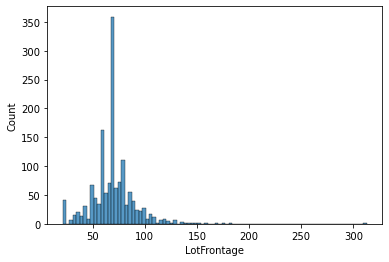

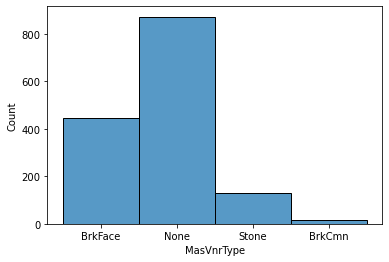

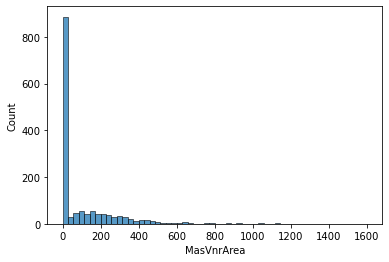

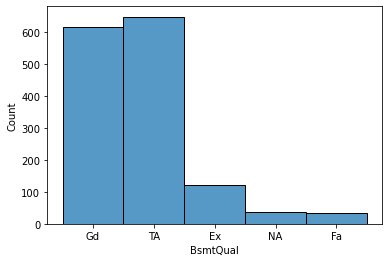

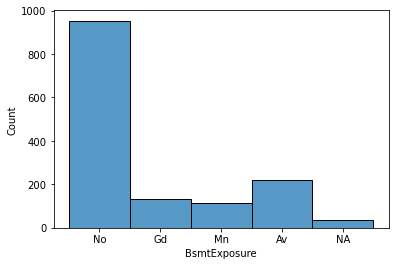

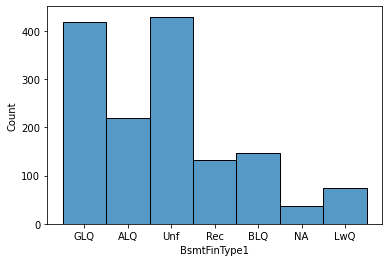

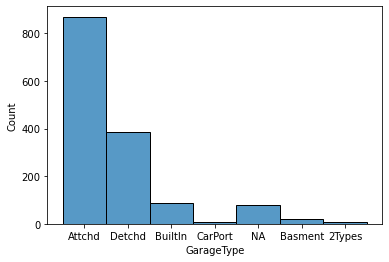

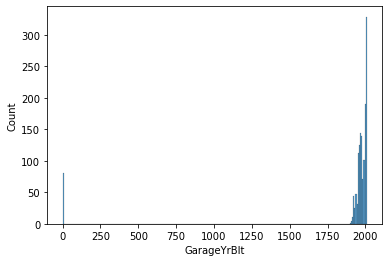

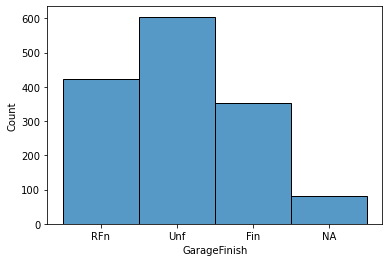

In [28]:
#Visual check of the colums with Nans
for col in columns_with_nan :
    sns.histplot(data=df,x=col)
    plt.show()

***

In [29]:
#Creating X, y and splitting into train and val

In [30]:
features_1=df.columns
X=df[features_1]
y=X.pop('SalePrice')
X.info() #46 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   LotShape      1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  RoofStyle     1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1460 non-null   object 
 17  MasVnrArea    1460 non-null   float64
 18  ExterQual     1460 non-null 

In [31]:
X=pd.get_dummies(X)
X.head() #163 columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,0,0,0,0,1,0


In [32]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479,0.241096,0.055479,0.289041,0.414384
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.490887,0.113372,0.238075,0.078298,0.441521,0.228992,0.427895,0.228992,0.453472,0.492784
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0) 

***

In [35]:
# 1st Model fitting

In [36]:
from sklearn.ensemble import RandomForestRegressor
model_1= RandomForestRegressor(n_estimators = 100, random_state = 0)
model_1.fit(train_X,train_y)

RandomForestRegressor(random_state=0)

In [37]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(val_y, model_1.predict(val_X))
#MAE = 17430.867506849314

17430.867506849314

***

In [38]:
#Correlated features

In [39]:
correlation=train_X.corr()

<AxesSubplot:>

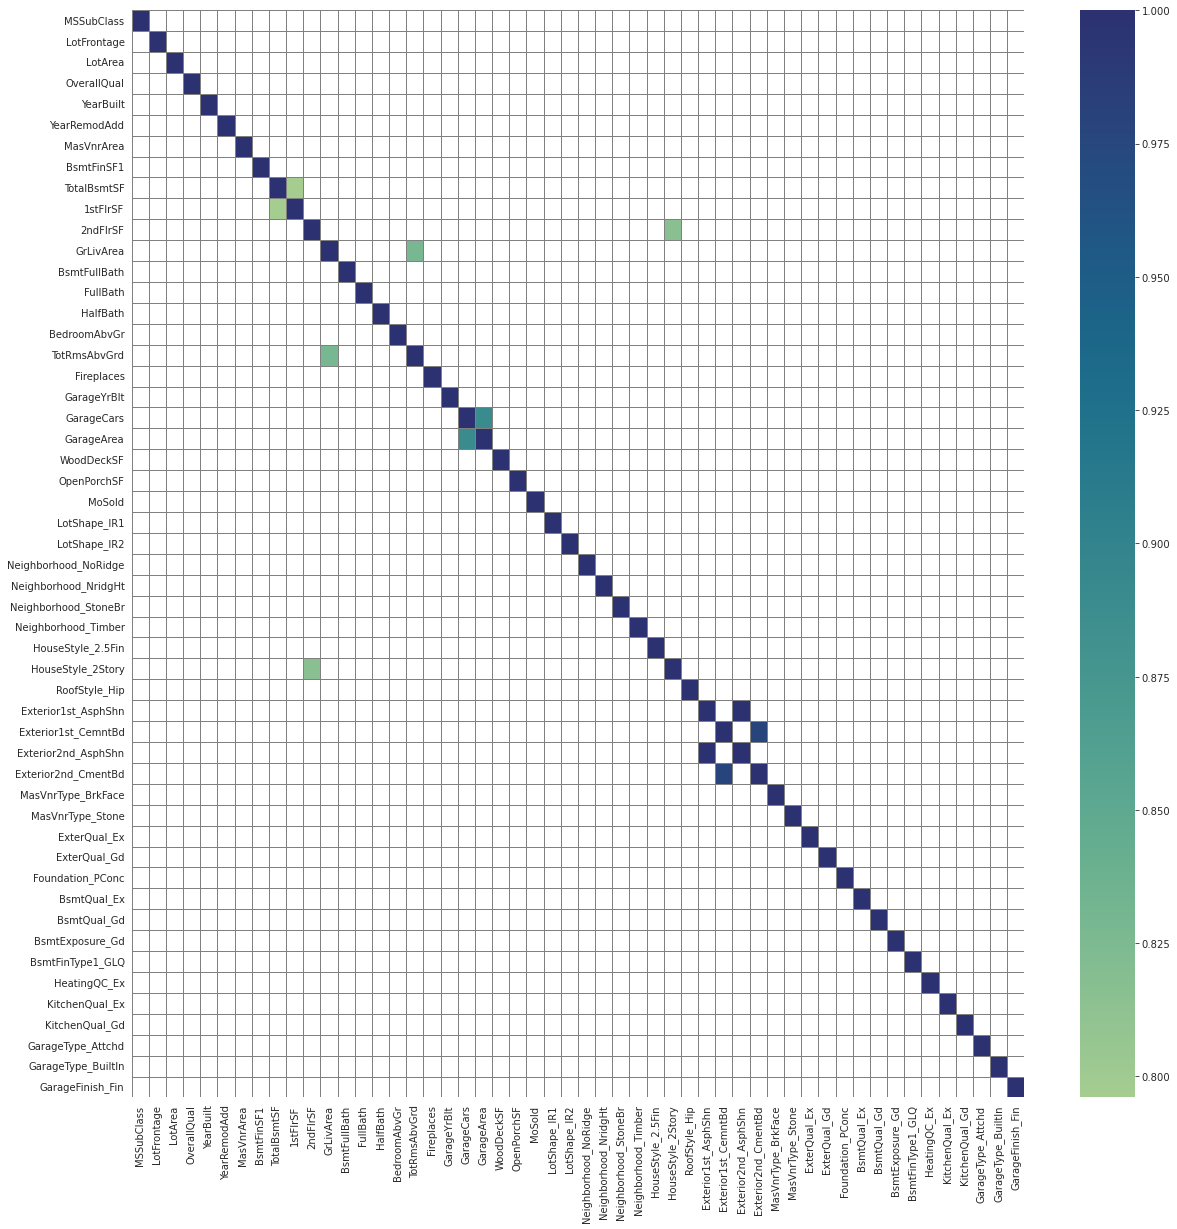

In [40]:
high_sums=[correlation[col].sum()-1>0.7 for col in correlation.columns]
high_corr=correlation[high_sums]
high_corr=high_corr[high_corr.index]

plt.rcParams['figure.figsize']=20,20
sns.set_style("whitegrid")
sns.heatmap(high_corr,mask=high_corr<0.7,cmap='crest',linewidths=0.5, linecolor='grey')

#High correlation for :
#TotalBsmtSF and 1stFlrSF
#GRLivArea and TotRmsAbvGrd
#2ndFlrSF and HouseStyle_2Story
#GarageCars and GarageArea
#Exterior1st_CemntBd and Exterior2nd_CmentBd
#Exterior1st_AsphShn and Exterior2nd_AsphShn

In [41]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_1, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm,top=10, feature_names = val_X.columns.tolist())

Weight,Feature
0.4656 ± 0.0767,OverallQual
0.1105 ± 0.0235,GrLivArea
0.0207 ± 0.0072,TotalBsmtSF
0.0176 ± 0.0042,BsmtFinSF1
0.0153 ± 0.0050,GarageCars
0.0143 ± 0.0050,1stFlrSF
0.0084 ± 0.0013,2ndFlrSF
0.0076 ± 0.0026,LotArea
0.0043 ± 0.0015,YearRemodAdd
0.0035 ± 0.0014,OverallCond


In [42]:
weights=perm.feature_importances_
Feature_weights=pd.DataFrame({'Features':val_X.columns,'Weights':weights})

In [43]:
Feature_weights=Feature_weights.sort_values(by=["Weights"],ascending=False)

In [44]:
Feature_weights[Feature_weights['Weights']>0]

,Features,Weights
4,OverallQual,4.656281e-01
14,GrLivArea,1.104949e-01
11,TotalBsmtSF,2.074755e-02
9,BsmtFinSF1,1.763075e-02
22,GarageCars,1.532742e-02
...,...,...
123,Foundation_Slab,1.657088e-06
95,Exterior1st_WdShing,1.218792e-06
60,Neighborhood_SWISU,6.946357e-07
96,Exterior2nd_AsbShng,4.687911e-07


In [45]:
print(Feature_weights[Feature_weights['Features']=='TotRmsAbvGrd'])

print(Feature_weights[Feature_weights['Features']=='2ndFlrSF'])
print(Feature_weights[Feature_weights['Features']=='HouseStyle_2Story'])

print(Feature_weights[Feature_weights['Features']=='GarageCars'])
print(Feature_weights[Feature_weights['Features']=='GarageArea'])

print(Feature_weights[Feature_weights['Features']=='Exterior1st_CemntBd'])
print(Feature_weights[Feature_weights['Features']=='Exterior2nd_CmentBd'])

print(Feature_weights[Feature_weights['Features']=='Exterior1st_AsphShn'])
print(Feature_weights[Feature_weights['Features']=='Exterior2nd_AsphShn'])

#TotalBsmtSF > 1stFlrSF
#GRLivArea > TotRmsAbvGrd
#2ndFlrSF >HouseStyle_2Story
#GarageCars > GarageArea
#Exterior1st_CemntBd < Exterior2nd_CmentBd
#Exterior1st_AsphShn and Exterior2nd_AsphShn =0
to_remove=['1stFlrSF','TotRmsAbvGrd','HouseStyle_2Story','GarageArea','Exterior1st_CemntBd']

        Features   Weights
19  TotRmsAbvGrd -0.001876
    Features  Weights
13  2ndFlrSF  0.00842
             Features  Weights
72  HouseStyle_2Story -0.00006
      Features   Weights
22  GarageCars  0.015327
      Features   Weights
23  GarageArea  0.001282
               Features   Weights
86  Exterior1st_CemntBd -0.000006
                Features   Weights
101  Exterior2nd_CmentBd  0.000059
               Features  Weights
82  Exterior1st_AsphShn      0.0
               Features  Weights
97  Exterior2nd_AsphShn      0.0


In [46]:
Selected_features=Feature_weights[Feature_weights['Weights']>0].Features.tolist()
len(Selected_features) #98

98

In [47]:
Selected_features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageCars',
 '1stFlrSF',
 '2ndFlrSF',
 'LotArea',
 'YearRemodAdd',
 'OverallCond',
 'OpenPorchSF',
 'YearBuilt',
 'GarageYrBlt',
 'BsmtQual_Ex',
 'BsmtUnfSF',
 'MSZoning_RM',
 'GarageArea',
 'Neighborhood_Edwards',
 'FullBath',
 'MSSubClass',
 'HalfBath',
 'BsmtQual_Gd',
 'ExterQual_Gd',
 'KitchenQual_Gd',
 'Neighborhood_StoneBr',
 'LotShape_IR1',
 'BedroomAbvGr',
 'RoofStyle_Gable',
 'KitchenQual_TA',
 'BsmtExposure_Av',
 'LotConfig_Inside',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'BsmtExposure_No',
 'Fireplaces',
 'MasVnrType_Stone',
 'Neighborhood_Crawfor',
 'LotShape_Reg',
 'RoofStyle_Hip',
 'GarageType_BuiltIn',
 'BsmtFinType1_GLQ',
 'ExterQual_Ex',
 'GarageType_Detchd',
 'MasVnrType_BrkFace',
 'Neighborhood_NAmes',
 'Neighborhood_NridgHt',
 'Foundation_PConc',
 'MSZoning_RL',
 'ExterQual_TA',
 'Exterior1st_Plywood',
 'WoodDeckSF',
 'HouseStyle_1.5Fin',
 'Neighborhood_OldTown',
 'BsmtFinType1_ALQ',
 'Foundation_CB

In [48]:
for item in to_remove:
    if item in Selected_features :
        Selected_features.remove(item)

In [49]:
len(Selected_features) #96

96

***

In [50]:
# 2nd Model fitting

In [51]:
X2=X[Selected_features]

In [52]:
train_X, val_X, train_y, val_y = train_test_split(X2,y,random_state=0) 

In [53]:
model_2= RandomForestRegressor(n_estimators = 100, random_state = 0)
model_2.fit(train_X,train_y)

RandomForestRegressor(random_state=0)

In [54]:
mean_absolute_error(val_y, model_2.predict(val_X))
#MAE = 16800.763835616435

16800.763835616435

***

In [55]:
#2nd model feature analysis

In [56]:
perm = PermutationImportance(model_2, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm,top=10, feature_names = val_X.columns.tolist())

Weight,Feature
0.4899 ± 0.1105,OverallQual
0.1233 ± 0.0336,GrLivArea
0.0442 ± 0.0085,TotalBsmtSF
0.0182 ± 0.0081,BsmtFinSF1
0.0178 ± 0.0031,GarageCars
0.0091 ± 0.0007,LotArea
0.0065 ± 0.0031,YearBuilt
0.0064 ± 0.0028,YearRemodAdd
0.0030 ± 0.0012,OverallCond
0.0027 ± 0.0040,BedroomAbvGr


In [57]:
weights=perm.feature_importances_
Feature_weights=pd.DataFrame({'Features':val_X.columns,'Weights':weights})

In [58]:
Feature_weights=Feature_weights.sort_values(by=["Weights"],ascending=False)

In [59]:
Top10=Feature_weights.head(10).Features.tolist()

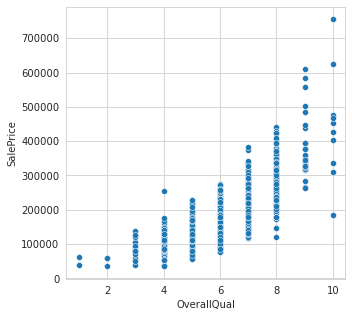

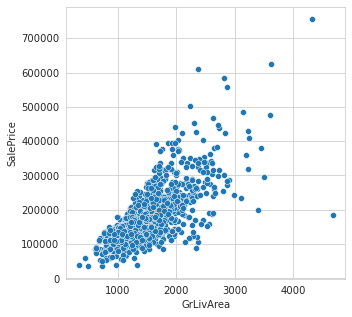

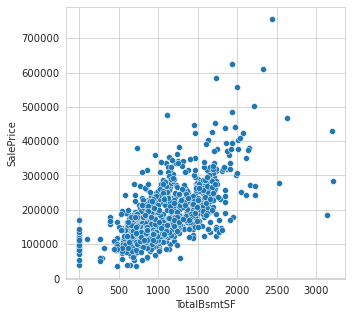

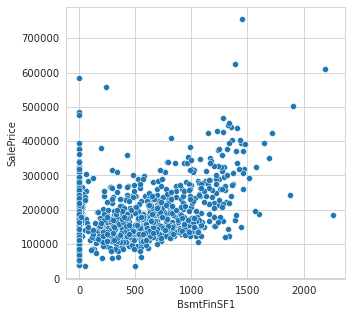

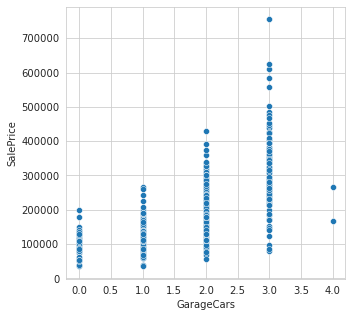

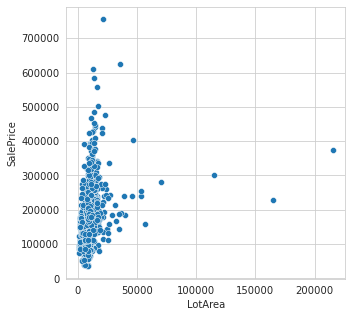

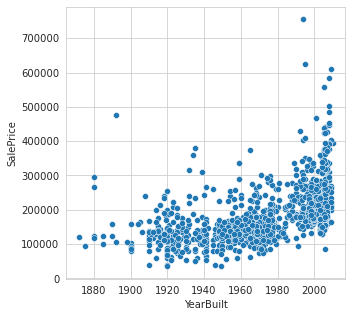

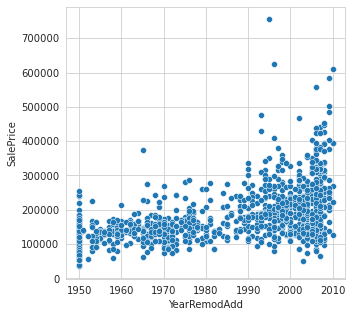

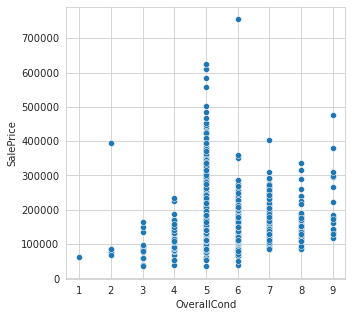

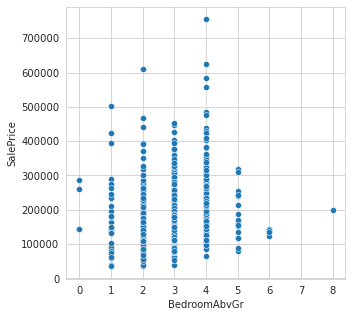

In [60]:
for feature in Top10:
    plt.rcParams['figure.figsize']=5,5
    sns.scatterplot(x=train_X[feature],y=train_y)
    plt.show()

In [61]:
import numpy as np

In [62]:
X3=X2.copy()
X3['NewQual']=(X3['OverallQual'])**2
X3=X3.drop('OverallQual',axis=1)
X3.head()

,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageCars,2ndFlrSF,LotArea,YearRemodAdd,OverallCond,OpenPorchSF,YearBuilt,...,MSZoning_FV,Exterior2nd_Stone,Exterior2nd_Brk Cmn,Neighborhood_BrDale,Foundation_Slab,Exterior1st_WdShing,Neighborhood_SWISU,Exterior2nd_AsbShng,Neighborhood_NPkVill,NewQual
0,1710,856,706,2,854,8450,2003,5,61,2003,...,0,0,0,0,0,0,0,0,0,49
1,1262,1262,978,2,0,9600,1976,8,0,1976,...,0,0,0,0,0,0,0,0,0,36
2,1786,920,486,2,866,11250,2002,5,42,2001,...,0,0,0,0,0,0,0,0,0,49
3,1717,756,216,3,756,9550,1970,5,35,1915,...,0,0,0,0,0,0,0,0,0,49
4,2198,1145,655,3,1053,14260,2000,5,84,2000,...,0,0,0,0,0,0,0,0,0,64


***

In [63]:
# 3rd Model fitting

In [64]:
train_X, val_X, train_y, val_y = train_test_split(X3,y,random_state=0) 

In [65]:
model_3= RandomForestRegressor(n_estimators = 100, random_state = 0)
model_3.fit(train_X,train_y)

RandomForestRegressor(random_state=0)

In [66]:
mean_absolute_error(val_y, model_3.predict(val_X))
#MAE = 16837.17728767123

16837.17728767123

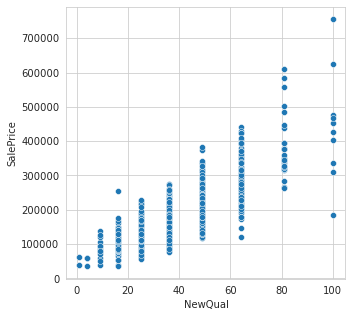

In [67]:
plt.rcParams['figure.figsize']=5,5
log=np.log(train_X['NewQual'])
sns.scatterplot(x=train_X['NewQual'],y=train_y)
plt.show()

***

In [68]:
#Getting rid of outliers

In [69]:
X4=X3.copy()
X4['SalesPrice']=y
X4=X4.query('GrLivArea<3000 and TotalBsmtSF<2000 and BsmtFinSF1<1500 and GarageCars<4 and LotArea<50000')
y=X4.pop('SalesPrice')
X4.describe()

,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageCars,2ndFlrSF,LotArea,YearRemodAdd,OverallCond,OpenPorchSF,YearBuilt,...,MSZoning_FV,Exterior2nd_Stone,Exterior2nd_Brk Cmn,Neighborhood_BrDale,Foundation_Slab,Exterior1st_WdShing,Neighborhood_SWISU,Exterior2nd_AsbShng,Neighborhood_NPkVill,NewQual
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.00000,1394.000000,1394.000000,1394.000000,1394.000000,...,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,1471.941176,1016.732425,412.355093,1.727403,342.286944,9672.98637,1984.452654,5.588235,45.538020,1970.860115,...,0.046628,0.002869,0.005022,0.011478,0.017217,0.017934,0.016499,0.014347,0.006456,37.991392
std,459.887025,371.623988,400.912693,0.723125,422.226112,4350.55598,20.768463,1.111723,65.222588,30.023797,...,0.210917,0.053509,0.070710,0.106556,0.130124,0.132759,0.127431,0.118960,0.080120,16.225437
min,334.000000,0.000000,0.000000,0.000000,0.000000,1300.00000,1950.000000,1.000000,0.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1118.500000,788.000000,0.000000,1.000000,0.000000,7440.00000,1966.000000,5.000000,0.000000,1953.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,1436.500000,973.500000,369.500000,2.000000,0.000000,9308.00000,1993.000000,5.000000,24.000000,1972.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,1733.750000,1248.750000,686.000000,2.000000,728.000000,11329.00000,2004.000000,6.000000,66.000000,2000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
max,2978.000000,1992.000000,1480.000000,3.000000,1611.000000,46589.00000,2010.000000,9.000000,547.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


***

In [70]:
#4th model fitting

In [71]:
train_X, val_X, train_y, val_y = train_test_split(X4,y,random_state=0) 

In [72]:
model_4= RandomForestRegressor(n_estimators = 100, random_state = 0)
model_4.fit(train_X,train_y)

RandomForestRegressor(random_state=0)

In [73]:
mean_absolute_error(val_y, model_3.predict(val_X))
#MAE = 8725.755783872288

8725.755783872288

***

In [74]:
perm = PermutationImportance(model_4, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm,top=10, feature_names = val_X.columns.tolist())

Weight,Feature
0.4518 ± 0.0223,NewQual
0.1725 ± 0.0092,GrLivArea
0.0520 ± 0.0085,TotalBsmtSF
0.0309 ± 0.0127,GarageCars
0.0270 ± 0.0081,BsmtFinSF1
0.0084 ± 0.0031,YearBuilt
0.0079 ± 0.0024,MasVnrArea
0.0070 ± 0.0019,LotArea
0.0064 ± 0.0023,YearRemodAdd
0.0058 ± 0.0048,BsmtQual_Ex


In [75]:
Final_features=X4.columns

In [76]:
test_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

test_data['NewQual']=(test_data['OverallQual'])**2
test_data=test_data.drop('OverallQual',axis=1)
test_data.head() #80 col

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NewQual
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,25
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,36
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,25
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,36
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,64


In [77]:
test_data['LotFrontage']= test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MasVnrType']= test_data['MasVnrType'].fillna('None')
test_data['MasVnrArea']= test_data['MasVnrArea'].fillna(0)
test_data['BsmtQual']= test_data['BsmtQual'].fillna("NA")

test_data[test_data.BsmtExposure.isna()][test_data.BsmtQual.isna()==False].BsmtExposure="No"
test_data['BsmtExposure']= test_data['BsmtExposure'].fillna("NA")

test_data['BsmtFinType1']= test_data['BsmtFinType1'].fillna("NA")
test_data['GarageType']= test_data['GarageType'].fillna("NA")
test_data['GarageYrBlt']= test_data['GarageYrBlt'].fillna(0)
test_data['GarageFinish']= df['GarageFinish'].fillna("NA")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [78]:
test_data.columns[[test_data[col].isna().sum()>0 for col in test_data.columns]]

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [79]:
test_data=pd.get_dummies(test_data)

In [80]:
X = test_data[Final_features]

In [81]:
X.columns[[X[col].isna().sum()>0 for col in X.columns]]

Index(['TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', 'BsmtUnfSF'], dtype='object')

In [82]:
X['TotalBsmtSF']= X['TotalBsmtSF'].fillna(0)
X['BsmtFinSF1']= X['BsmtFinSF1'].fillna(0)
X['GarageCars']= X['GarageCars'].fillna(0)
X['BsmtUnfSF']= X['BsmtUnfSF'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [83]:
test_preds = model_4.predict(X)

In [84]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)